# Fake News Analysis and Classification

This notebook performs exploratory data analysis (EDA) on the fake news dataset and evaluates different classification models.

In [4]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the parent directory to the path to import the models module
sys.path.append('..')
from models import load_data, LogisticModel, DistilBertModel

## 1. Load and Explore the Dataset

In [5]:
# Load the dataset
data = load_data('../data/fake_news_dataset.csv')
df = data['full_data']

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nClass distribution:\n{df['label'].value_counts()}")
print(f"\nClass distribution (percentage):\n{df['label'].value_counts(normalize=True) * 100}")

Dataset shape: (4000, 24)

Class distribution:
label
Fake    2026
Real    1974
Name: count, dtype: int64

Class distribution (percentage):
label
Fake    50.65
Real    49.35
Name: proportion, dtype: float64


In [6]:
# Display sample data
df.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


## 2. Exploratory Data Analysis

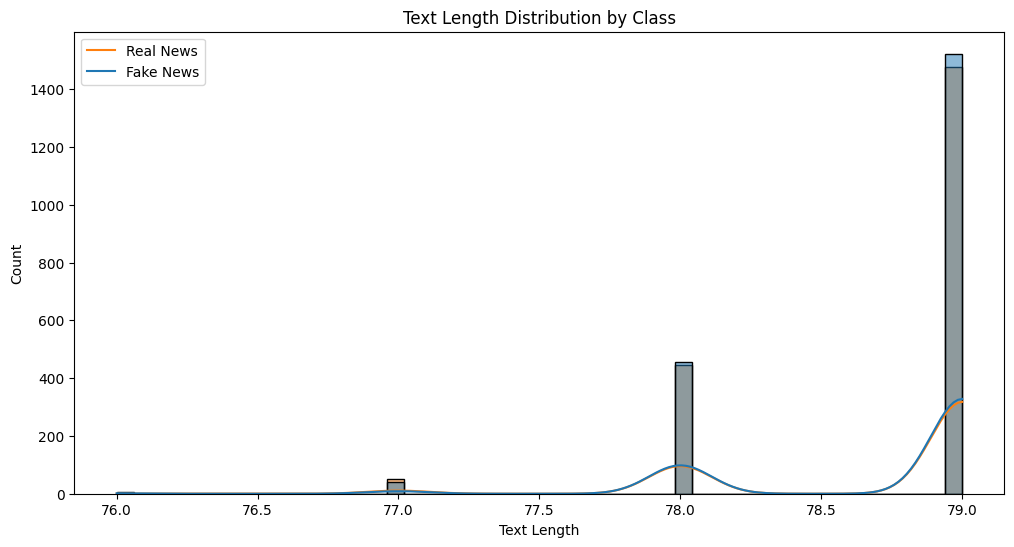

In [7]:
# Text length distribution
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Text Length Distribution by Class')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.legend(['Real News', 'Fake News'])
plt.show()

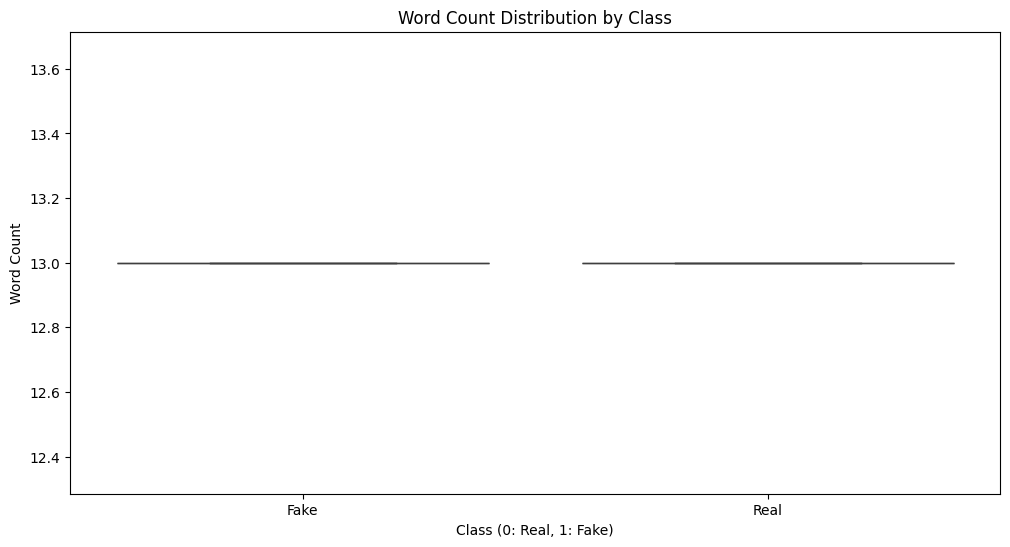

In [8]:
# Word count distribution
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='label', y='word_count')
plt.title('Word Count Distribution by Class')
plt.xlabel('Class (0: Real, 1: Fake)')
plt.ylabel('Word Count')
plt.show()

## 3. Train and Evaluate Logistic Regression Model

Logistic Regression Model Metrics:
Accuracy: 0.5062
Precision: 0.5062
Recall: 1.0000
F1_score: 0.6722


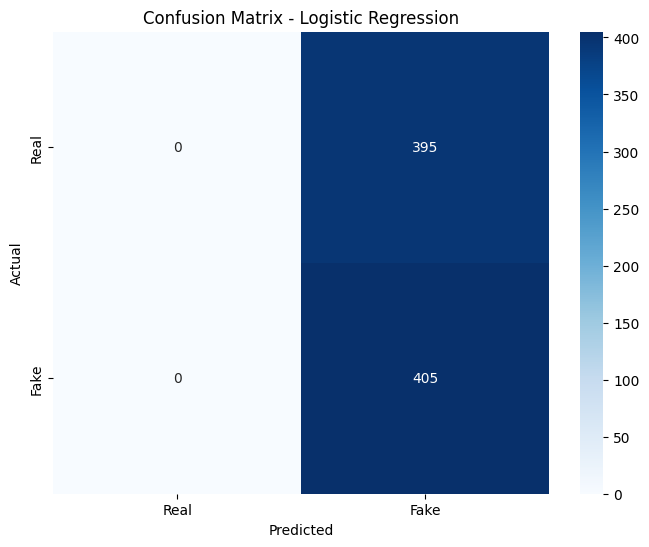

In [11]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticModel(max_features=10000, preprocess=True)
logistic_model.train(data['train']['texts'], data['train']['labels'])

# Convert string labels to numeric
if data['train']['labels'].dtype == object:  # Check if labels are strings
    # Map 'Real' to 0 and 'Fake' to 1
    data['train']['labels'] = data['train']['labels'].map({'Real': 0, 'Fake': 1})
    data['test']['labels'] = data['test']['labels'].map({'Real': 0, 'Fake': 1})

# Initialize and train the Logistic Regression model
logistic_model = LogisticModel(max_features=10000, preprocess=True)
logistic_model.train(data['train']['texts'], data['train']['labels'])



# Evaluate the model
logistic_metrics = logistic_model.evaluate(data['test']['texts'], data['test']['labels'])

# Display metrics
print("Logistic Regression Model Metrics:")
for metric, value in logistic_metrics.items():
    if metric != 'confusion_matrix':
        print(f"{metric.capitalize()}: {value:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    logistic_metrics['confusion_matrix'],
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Real', 'Fake'],
    yticklabels=['Real', 'Fake']
)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model
logistic_model.save('../models/logistic_model.pkl')

## 4. Train and Evaluate DistilBERT Model

In [12]:
# Initialize and train the DistilBERT model
# Note: This may take some time to run
distilbert_model = DistilBertModel(max_length=128, batch_size=16, epochs=2)
distilbert_model.train(data['train']['texts'], data['train']['labels'])

# Evaluate the model
distilbert_metrics = distilbert_model.evaluate(data['test']['texts'], data['test']['labels'])

# Display metrics
print("DistilBERT Model Metrics:")
for metric, value in distilbert_metrics.items():
    if metric != 'confusion_matrix':
        print(f"{metric.capitalize()}: {value:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    distilbert_metrics['confusion_matrix'],
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Real', 'Fake'],
    yticklabels=['Real', 'Fake']
)
plt.title('Confusion Matrix - DistilBERT')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model
distilbert_model.save('../models/distilbert_model')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\smaou\OneDrive\Bureau\Amine_Smaoui\BAML\baml-venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\smaou\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 

## 5. Compare Model Performance

In [ ]:
# Compare model performance
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
models = ['Logistic Regression', 'DistilBERT']
performance = {
    'Logistic Regression': [logistic_metrics[metric] for metric in metrics],
    'DistilBERT': [distilbert_metrics[metric] for metric in metrics]
}

# Create a DataFrame for comparison
performance_df = pd.DataFrame(performance, index=metrics)
performance_df.index = [metric.capitalize() for metric in metrics]

# Display the comparison
performance_df

In [ ]:
# Plot the comparison
performance_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 6. Example Predictions

In [ ]:
# Get some examples from the test set
examples = data['test']['texts'].iloc[:5].tolist()
true_labels = data['test']['labels'].iloc[:5].tolist()

# Make predictions with both models
logistic_preds = logistic_model.predict(examples)
distilbert_preds = distilbert_model.predict(examples)

# Display the results
results = pd.DataFrame({
    'Text': [text[:100] + '...' for text in examples],
    'True Label': true_labels,
    'Logistic Prediction': logistic_preds,
    'DistilBERT Prediction': distilbert_preds
})

results